## Esercizio 1

Si consideri il polinomio $$L(x)=(1/2) (5x^3-3x)$$ $x \in [-1,1]$

Si visualizzi il grafico del polinomio in [-1,1]

- Si implementi il metodo di Newton per la determinazione degli zeri di un'equazione non lineare [**Punti 4**]

- Si implementi il metodo di Bisezione per la determinazione degli zeri di un'equazione non lineare [**Punti 4**]

- Si utilizzi il metodo di Newton con iterato iniziale $x_0=1$ per determinare lo zero $x^*$ piu' vicino ad 1. [**Punti 2**]

Si consideri la funzione $q(x)=L(x)/(x-x^*)$ dove $x^*$ è lo zero calcolato nel punto precedente. Si applichi il metodo di Newton con iterato iniziale $x_0=-0.5$ per calcolare uno zero della funzione $q(x)$  e si verifichi che è anche zero di $L(x)$  [**Punti 2**]

Si applichi il metodo di bisezione alle funzioni $q(x)$ ed $L(x)$ definite in [-1,1] e si fornisca una spiegazione teorica dei risultati ottenuti  [**Punti 2**]

                                                                                                                Punti [14]

In [128]:
import numpy as np
import math
def sign(a):
  """
  Funzione segno che restituisce 1 se x è positivo, 0 se x è zero e -1 se x è negativo.
  """
  return math.copysign(1, a)
def newton(fname,fpname,x0,tolx,tolf,nmax):
        """
        Implementa il metodo di Newton per il calcolo degli zeri di un'equazione non lineare.

        Parametri:
        fname: La funzione di cui si vuole calcolare lo zero.
        fpname: La derivata prima della funzione di  cui si vuole calcolare lo zero.
        x0: iterato iniziale
        tolx: La tolleranza di errore tra due iterati successivi
        tolf: tolleranza sul valore della funzione
        nmax: numero massimo di iterazione

        Restituisce:
        Lo zero approssimato della funzione, il numero di iterazioni e la lista degli iterati intermedi.
        """ 
        xk=[]
        fx0=fname(x0)
        if abs(fpname(fx0))<=np.spacing(1): 
            print(" derivata prima nulla in x0")
            return None, None,None
        
        d=fx0/fpname(x0)
        x1=x0-d
        
        fx1=fname(x1)
        xk.append(x1)
        it=1
        
        while it<=nmax and  abs(fx1)>=tolf and abs(d)>=tolx*abs(x1):
           x0= x1
           fx0= fname(x0)
           if abs(fpname(fx0))<=np.spacing(1): #Se la derivata prima e' pià piccola della precisione di macchina stop
                print(" derivata prima nulla in x0")
                return None, None,None
           d=fx0/fpname(x0)
            
           x1=x0-d
           fx1=fname(x1)
           it=it+1
         
           xk.append(x1)
          
        if it==nmax:
            print('raggiunto massimo numero di iterazioni \n')
            
        
        return x1,it,xk

def metodo_bisezione(fname, a, b, tolx,nmax):
 """
 Implementa il metodo di bisezione per il calcolo degli zeri di un'equazione non lineare.

 Parametri:
  f: La funzione da cui si vuole calcolare lo zero.
  a: L'estremo sinistro dell'intervallo di ricerca.
  b: L'estremo destro dell'intervallo di ricerca.
  tol: La tolleranza di errore.

 Restituisce:
  Lo zero approssimato della funzione, il numero di iterazioni e la lista di valori intermedi.
 """
 fa=fname(a)
 fb=fname(b)
 if   sign(fa)*sign(fb) >= 0:
     print("Non è possibile applicare il metodo di bisezione \n")
     return None, None,None

 it = 0
 v_xk = []

 maxit = math.ceil(math.log((b - a) / tolx) / math.log(2))-1

 
 while abs(b-a)>tolx and it<=nmax:
    xk =  a-(b-a)/2
    v_xk.append(xk)
    it += 1
    fxk=fname(xk)
    if fxk==0:
      return xk, it, v_xk

     
    if sign(fa)*sign(fxk)>0:   
       a=xk
       fa=fxk
    elif sign(fxk)*sign(fb)>0:    
       b=xk
       fb=fxk

 
 return xk, it, v_xk

In [129]:
import numpy as np
import matplotlib.pyplot as plt
def showGraph(fname):
    x = np.linspace(-1,1,200)
    y=fname(x)

    plt.plot(x,y)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

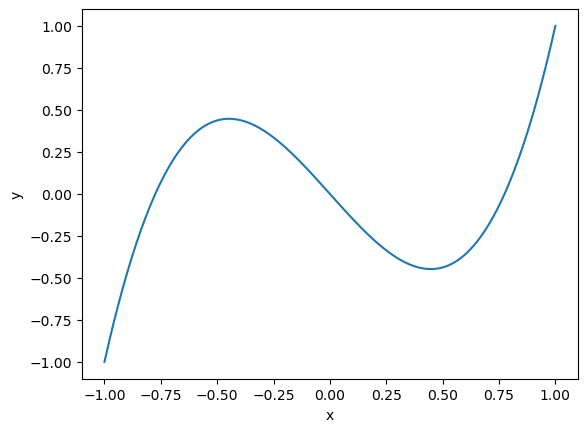

In [130]:


L=lambda x: 1/2*(5*x**3-3*x)

showGraph(L)

In [131]:
Lp=lambda x: 1/2*(15*x**2-3)
x0 = 1
xN,itN,val_N=newton(L,Lp,x0,1e-10,1e-10,500)
print("x* più vicina ad 1 => ",xN," trovato in ",itN," iterazioni")

x* più vicina ad 1 =>  0.7745966692414835  trovato in  5  iterazioni


In [132]:
q=lambda x: L(x)/(x-xN)
qp=lambda x: (Lp(x) * (x-xN) - L(x))/((x-xN)**2)
x0Q=-0.5
xNQ,itNQ,val_NQ=newton(q,qp,x0Q,1e-10,1e-10,500)
print("zero di q => ",xNQ," trovato in ",itNQ," iterazioni")

if L(x0Q) <= 1 and L(x0Q) >= 0:
    print("è uno zero anche di L",)
print("{:e}".format(L(x0Q)))

zero di q =>  -0.7745966692414833  trovato in  6  iterazioni
è uno zero anche di L
4.375000e-01


-3.33235132783979e+88 in  501
Non è possibile applicare il metodo di bisezione 



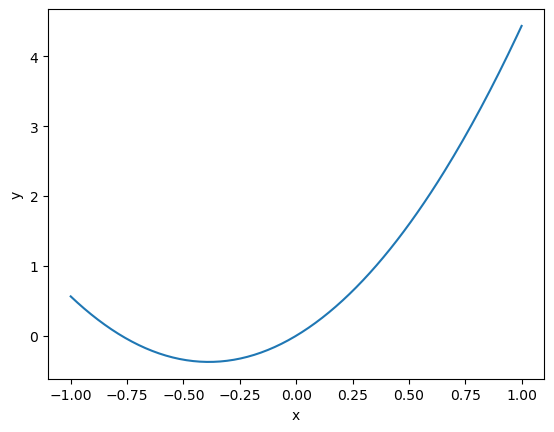

In [133]:
xL,itL,x_kL=metodo_bisezione(L,-1,1,1e-10,500)
print(xL,"in ",itL)
xQ,itQ,x_kQ=metodo_bisezione(q,-1,1,1e-10,500)
showGraph(q)